#### Source Code

### 1.1 Task 1: Credit Card Routing for Online Purchase via Predictive Modelling

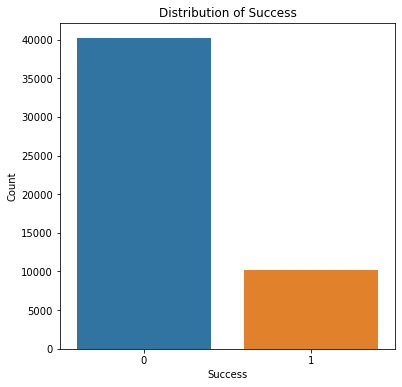

Null values:
 country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
year          0
month         0
day           0
dtype: int64


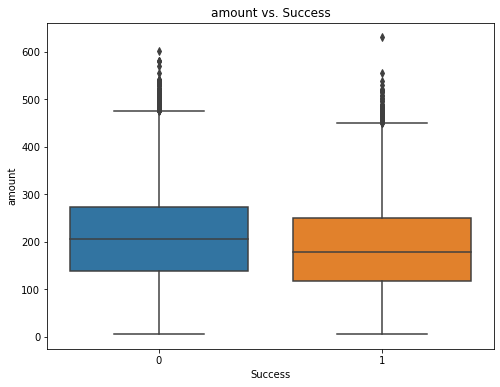

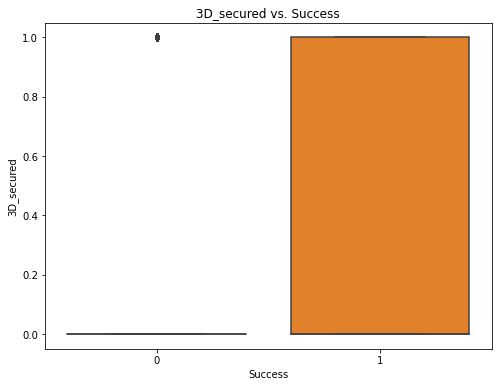

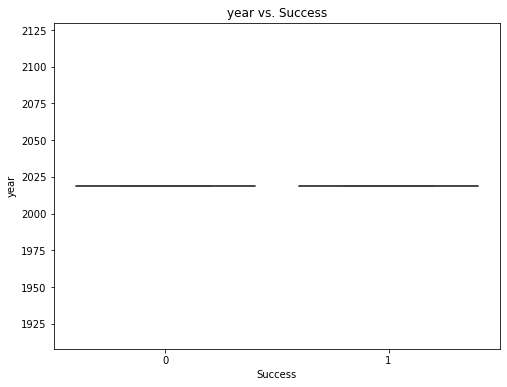

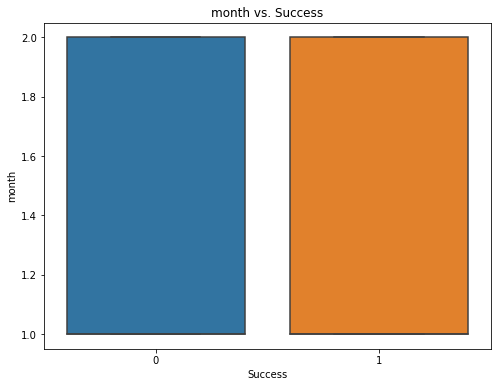

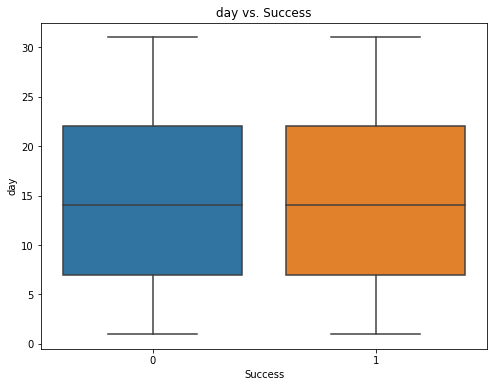

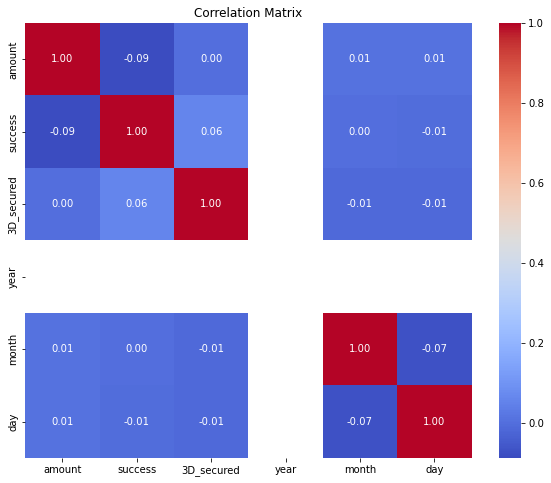

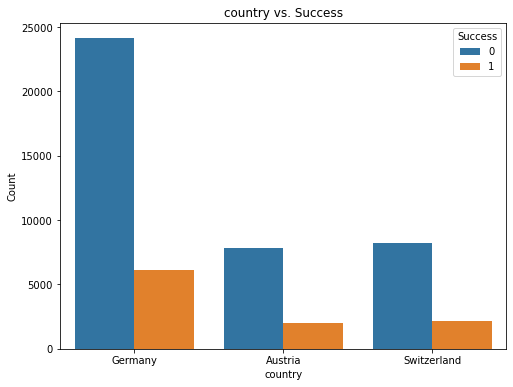

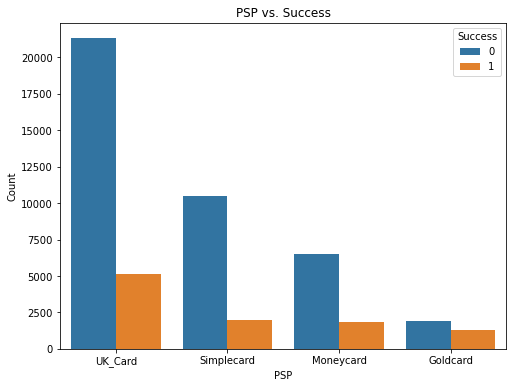

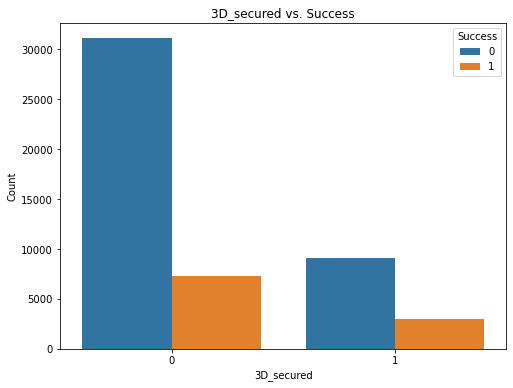

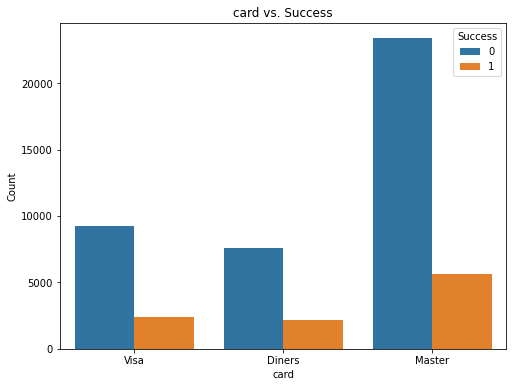

Balance of the dataset:
 0    40182
1    10228
Name: success, dtype: int64
Random Forest Accuracy: 0.5750244379276638
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58      2049
           1       0.58      0.57      0.57      2043

    accuracy                           0.58      4092
   macro avg       0.58      0.58      0.57      4092
weighted avg       0.58      0.58      0.57      4092

Random Forest Confusion Matrix:
[[1195  854]
 [ 885 1158]]

Logistic Regression Accuracy: 0.5525415444770283
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.59      0.57      2049
           1       0.56      0.51      0.53      2043

    accuracy                           0.55      4092
   macro avg       0.55      0.55      0.55      4092
weighted avg       0.55      0.55      0.55      4092

Logistic Regression Confusion Matrix:
[

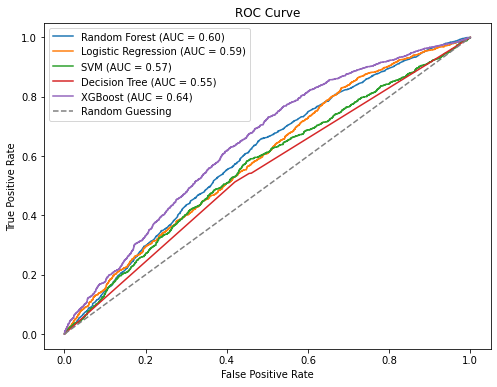

Number of features expected by the model: 8
Number of features in the input data: 8
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best Score: 0.3709248653565643
Accuracy: 0.7517106549364614
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      2049
           1       0.74      0.78      0.76      2043

    accuracy                           0.75      4092
   macro avg       0.75      0.75      0.75      4092
weighted avg       0.75      0.75      0.75      4092

Confusion Matrix:
[[1476  573]
 [ 443 1600]]


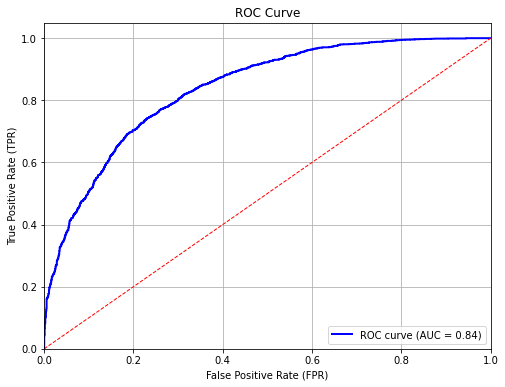

[1]
Creditcard Transaction is Successful


['creditcardmodel.pkl']

In [2]:
# Source Code for credit card project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import joblib
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, auc




# Load the dataset
df = pd.read_excel("PSP_Jan_Feb_2019.xlsx")

# Convert 'tmsp' column to datetime format if it's not already
df['tmsp'] = pd.to_datetime(df['tmsp'])

# Extract year, month, and day into separate columns
df['year'] = df['tmsp'].dt.year
df['month'] = df['tmsp'].dt.month
df['day'] = df['tmsp'].dt.day

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'tmsp'], axis=1)
df.head
#Describe
df.describe

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 6))
sns.countplot(x='success', data=df)
plt.title('Distribution of Success')
plt.xlabel('Success')
plt.ylabel('Count')
plt.show()

# Check for missing values
print("Null values:\n", df.isnull().sum())

# Visualize the relationship between numerical features and the target variable
num_features = ['amount', '3D_secured', 'year', 'month', 'day']
for feature in num_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='success', y=feature, data=df)
    plt.title(f'{feature} vs. Success')
    plt.xlabel('Success')
    plt.ylabel(feature)
    plt.show()


# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()    


# Visualize the relationship between categorical features and the target variable
cat_features = ['country', 'PSP', '3D_secured', 'card']
for feature in cat_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='success', data=df)
    plt.title(f'{feature} vs. Success')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Success', loc='upper right')
    plt.show()


# Check the balance of the dataset
print("Balance of the dataset:\n", df['success'].value_counts())

# Split features and target variable
X = df[['country', 'amount', 'PSP', '3D_secured', 'card', 'year', 'month', 'day']]
y = df['success']

# Perform feature encoding for categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df['PSP'] = label_encoder.fit_transform(df['PSP'])
df['card'] = label_encoder.fit_transform(df['card'])
df['country'] = label_encoder.fit_transform(df['country'])

# Prepare features and target variable
X = df.drop('success', axis=1)
y = df['success']

# Undersample the majority class to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize models
rf_classifier = RandomForestClassifier(random_state=42)
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
svm_classifier = SVC(kernel='rbf', gamma='scale', random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
xgb_classifier = xgb.XGBClassifier(random_state=42)

classifiers = {
    'Random Forest': rf_classifier,
    'Logistic Regression': lr_classifier,
    'SVM': svm_classifier,
    'Decision Tree': dt_classifier,
    'XGBoost': xgb_classifier
}

# Model training and evaluation
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")


# Fit the XGBoost model
xgb_classifier.fit(X_train, y_train)

# Compute ROC curve and AUC for each model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])
rf_auc = auc(rf_fpr, rf_tpr)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_classifier.predict_proba(X_test)[:,1])
lr_auc = auc(lr_fpr, lr_tpr)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_classifier.decision_function(X_test))
svm_auc = auc(svm_fpr, svm_tpr)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:,1])
dt_auc = auc(dt_fpr, dt_tpr)

xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_classifier.predict_proba(X_test)[:,1])
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Plot ROC curve for each model
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
    

# Save the best model
best_model = max(classifiers.items(), key=lambda x: accuracy_score(y_test, x[1].predict(X_test)))[1]
best_model

# Check the number of features expected by the model
num_features_expected = len(X_train.columns)
print("Number of features expected by the model:", num_features_expected)


# Check the number of features in the input data
import pandas as pd

# Convert tuple to DataFrame
input_df = pd.DataFrame(X.values, columns=['country', 'amount', 'PSP', '3D_secured', 'card', 'year', 'month', 'day'])

# Check the number of features in the input data
num_features_input = input_df.shape[1]
print("Number of features in the input data:", num_features_input)



#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler

# Define categorical and numerical columns
categorical_columns = ['country', 'PSP', 'card']
numerical_columns = ['amount', '3D_secured', 'year', 'month', 'day']

# Step 1: Address Class Imbalance using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Step 2: Preprocess categorical columns using LabelEncoder
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X_resampled[col] = label_encoders[col].fit_transform(X_resampled[col])

# Step 3: Hyperparameter Tuning for XGBoost using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb_classifier = xgb.XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Step 4: Evaluate the model with the best parameters
best_xgb = grid_search.best_estimator_

# Transform X_test using the same label encoders
for col in categorical_columns:
    X_test[col] = label_encoders[col].transform(X_test[col])

# Make predictions on test data
y_pred = best_xgb.predict(X_test)
# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, best_xgb.predict_proba(X_test)[:, 1])

# Calculate area under the curve (AUC)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#Prediction

input_data=(1,238,3,1,0,2019,1,1)

#Change the input data to a numpy array
input_data_numpy=np.asarray(input_data)

# Reshape the numpy array as we are predicting for only on instance
input_data_reshaped=input_data_numpy.reshape(1,-1)


prediction=best_xgb.predict(input_data_reshaped)
print(prediction)

if prediction[0]==0:
    print("Creditcard Transaction is Failure")
else:
    print("Creditcard Transaction is Successful")

    


import joblib

# Save the best XGBoost model to a file
joblib.dump(best_xgb, 'creditcardmodel.pkl')
    

In [3]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import pandas as pd
import xgboost as xgb
import joblib
import numpy as np

# Custom LabelEncoder to handle unseen labels
class CustomLabelEncoder:
    def __init__(self):
        self.encoder = {}
        self.counter = 1  # Start counter from 1 to avoid conflict with LabelEncoder's default behavior
    
    def fit_transform(self, data):
        encoded_data = []
        for value in data:
            if value not in self.encoder:
                self.encoder[value] = self.counter
                self.counter += 1
            encoded_data.append(self.encoder[value])
        return np.array(encoded_data)
    
    def transform(self, data):
        encoded_data = []
        for value in data:
            if value in self.encoder:
                encoded_data.append(self.encoder[value])
            else:
                # Handle previously unseen labels
                # You can assign a unique value or raise an error depending on your requirement
                encoded_data.append(0)  # Assigning a default value (you can change this)
        return np.array(encoded_data)

# Load the dataset
df = pd.read_excel("PSP_Jan_Feb_2019.xlsx")

# Convert 'tmsp' column to datetime format if it's not already
df['tmsp'] = pd.to_datetime(df['tmsp'])

# Extract year, month, and day into separate columns
df['year'] = df['tmsp'].dt.year
df['month'] = df['tmsp'].dt.month
df['day'] = df['tmsp'].dt.day

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'tmsp'], axis=1)

# Check for missing values
print("Null values:\n", df.isnull().sum())

# Check the balance of the dataset
print("Balance of the dataset:\n", df['success'].value_counts())

# Perform label encoding for categorical variables using CustomLabelEncoder
label_encoders = {}
for column in ['country', 'PSP', 'card']:
    le = CustomLabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Save label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')

# Prepare features and target variable
X = df.drop('success', axis=1)
y = df['success']

# Load the trained model
best_xgb = joblib.load('creditcardmodel.pkl')

# Create GUI window
window = tk.Tk()
window.title("Credit Card Transaction Prediction")

# Create variables for entry fields
country_var = tk.StringVar()
PSP_var = tk.StringVar()
card_var = tk.StringVar()
amount_var = tk.StringVar()
secured_var = tk.StringVar()
year_var = tk.StringVar()
month_var = tk.StringVar()
day_var = tk.StringVar()

# Function to make prediction
def predict_transaction():
    try:
        # Get input data from the GUI fields
        country = country_var.get()
        PSP = PSP_var.get()
        card = card_var.get()
        amount = float(amount_var.get())
        secured = int(secured_var.get())
        year = int(year_var.get())
        month = int(month_var.get())
        day = int(day_var.get())

        # Preprocess categorical variables
        country = label_encoders['country'].transform([country])[0]
        PSP = label_encoders['PSP'].transform([PSP])[0]
        card = label_encoders['card'].transform([card])[0]

        # Make prediction
        prediction = best_xgb.predict([[country, amount, PSP, secured, card, year, month, day]])

        # Show prediction result
        if prediction[0] == 0:
            messagebox.showinfo("Prediction", "Credit card transaction is a failure")
        else:
            messagebox.showinfo("Prediction", "Credit card transaction is successful")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# Create labels and entry fields for each input feature
labels = ['Country:', 'PSP:', 'Card:', 'Amount:', '3D Secured:', 'Year:', 'Month:', 'Day:']
variables = [country_var, PSP_var, card_var, amount_var, secured_var, year_var, month_var, day_var]

for i, label_text in enumerate(labels):
    label = ttk.Label(window, text=label_text)
    label.grid(row=i, column=0, padx=5, pady=5)

    entry = ttk.Entry(window, textvariable=variables[i])
    entry.grid(row=i, column=1, padx=5, pady=5)

# Prediction button
predict_button = ttk.Button(window, text="Predict", command=predict_transaction)
predict_button.grid(row=8, column=0, columnspan=2, padx=5, pady=5)

# Run the GUI loop
window.mainloop()


Null values:
 country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
year          0
month         0
day           0
dtype: int64
Balance of the dataset:
 0    40182
1    10228
Name: success, dtype: int64
